In [ ]:
#Importing the Libraries
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
all_data = pd.read_csv("SBIBANK.csv")
all_data=all_data.drop(['Date','Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
all_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13
1,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14
2,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13
3,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14
4,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14


In [ ]:

Close_list = all_data['Close'].tolist()
total=len(Close_list);

In [ ]:
j=0
j=0
D1=[]
D2=[]
D3=[]
D4=[]
D5=[]
D6=[]
D7=[]
D8=[]
D9=[]
D10=[]
DIFF=[]
PERCDIFF=[]
TARGET=[]
counter=0
for i in range(0,total):
  D1.append(Close_list[j+counter])
  D2.append(Close_list[j+counter+1])
  D3.append(Close_list[j+counter+2])
  D4.append(Close_list[j+counter+3])
  D5.append(Close_list[j+counter+4])
  D6.append(Close_list[j+counter+5])
  D7.append(Close_list[j+counter+6])
  D8.append(Close_list[j+counter+7])
  D9.append(Close_list[j+counter+8])
  D10.append(Close_list[j+counter+9])
  diff=Close_list[j+counter+9]-Close_list[j+counter+8]
  DIFF.append(diff)
  percdiff=(diff*100)/Close_list[j+counter+9]
  PERCDIFF.append(percdiff)
  if(percdiff>1.0):
    TARGET.append('pos')
  elif(percdiff<-1.0):
    TARGET.append('neg')
  else:
    TARGET.append('neu')
  j=j+1;
  if(j==total-(counter+9)):
    break

In [ ]:
df1=pd.DataFrame(D1)
df2=pd.DataFrame(D2)
df3=pd.DataFrame(D3)
df4=pd.DataFrame(D4)
df5=pd.DataFrame(D5)
df6=pd.DataFrame(D6)
df7=pd.DataFrame(D7)
df8=pd.DataFrame(D8)
df9=pd.DataFrame(D9)
df10=pd.DataFrame(D10)
df11=pd.DataFrame(DIFF)
df12=pd.DataFrame(PERCDIFF)
df13=pd.DataFrame(TARGET)
df=pd.DataFrame()
df['Close']=all_data['Close']
df['D1']=df1
df['D2']=df2
df['D3']=df3
df['D4']=df4
df['D5']=df5
df['D6']=df6
df['D7']=df7
df['D8']=df8
df['D9']=df9
df['D10']=df10
df['DIFF']=df11
df['PERCDIFF']=df12
df['TARGET']=df13
df.dropna(inplace=True)
df.head(10)

,Close,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,DIFF,PERCDIFF,TARGET
0,243.65,243.65,259.10,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,-5.30,-2.215719,neg
1,259.10,259.10,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,-3.30,-1.398898,neg
2,248.45,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,0.55,0.232607,neu
3,261.00,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,7.50,3.074400,pos
4,273.30,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,-6.25,-2.629365,neg
5,269.50,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,-0.25,-0.105285,neu
6,247.95,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,-9.15,-4.007884,neg
7,244.75,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,-3.45,-1.534356,neg
8,244.50,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,5.30,2.302846,pos
9,239.20,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,248.50,18.35,7.384306,pos


In [ ]:
#DUMMY CODING USING THE LOOP STRUCTURE
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=pd.Categorical(df[col]).codes
df.head(5)

,Close,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,DIFF,PERCDIFF,TARGET
0,243.65,243.65,259.10,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,-5.30,-2.215719,0
1,259.10,259.10,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,-3.30,-1.398898,0
2,248.45,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,0.55,0.232607,1
3,261.00,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,7.50,3.074400,2
4,273.30,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,-6.25,-2.629365,0


In [ ]:
features = ['D1','D2','D3','D4','D5','D6','D7','D8']
output_var=df['TARGET']
df1=df[features]

In [ ]:
df0=pd.DataFrame()
df0['TARGET']= np.where(df['TARGET']==0,'1',(np.where(df['TARGET']==1,'-1','0')))

df0.head()
df0.groupby('TARGET').size()

,TARGET
0,1
1,1
2,-1
3,0
4,1


TARGET
-1    2320
0     1665
1     1583
dtype: int64

#Explore the class distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'TARGET')

Text(0.5, 1.0, 'Number of positive negative and neutral messages')

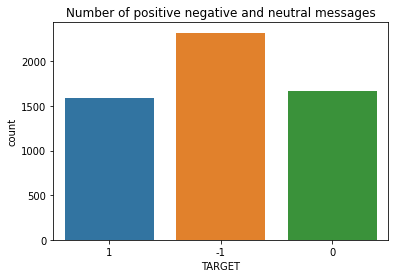

In [ ]:
sns.countplot(df0['TARGET'])
plt.xlabel('TARGET')
plt.title('Number of positive negative and neutral messages')

In [ ]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df1[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform)
feature_transform.head()

,D1,D2,D3,D4,D5,D6,D7,D8
0,0.030521,0.035135,0.031955,0.035703,0.039376,0.038241,0.031805,0.030850
1,0.035135,0.031955,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775
2,0.031955,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192
3,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207
4,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207,0.028371


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe0e219ed0>)

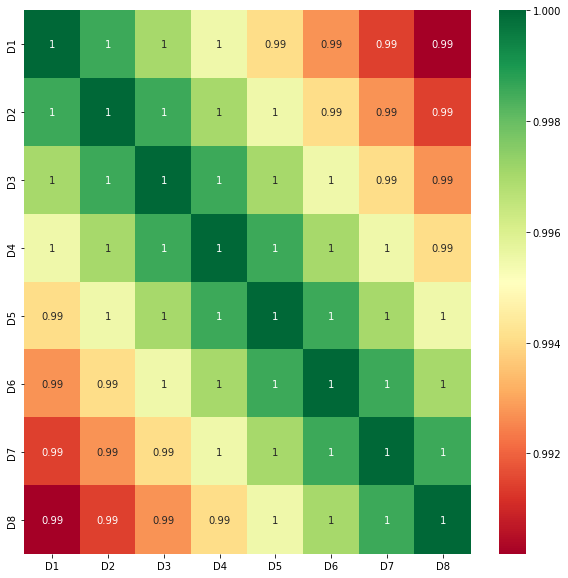

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(10,10))
sns.heatmap(feature_transform.corr(),cmap='RdYlGn',annot=True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(5).fit(feature_transform)
str(pca.explained_variance_ratio_.sum())

'0.9997010993448573'

In [ ]:
pca_df=pd.DataFrame(pca.components_,columns=feature_transform.columns)
pca_df

,D1,D2,D3,D4,D5,D6,D7,D8
0,0.353157,0.353518,0.353756,0.353867,0.353856,0.353724,0.353467,0.353083
1,0.481194,0.419936,0.286065,0.101122,-0.101201,-0.286127,-0.419973,-0.481206
2,-0.459657,-0.194041,0.188316,0.464338,0.464317,0.188269,-0.194088,-0.459657
3,0.425404,-0.091361,-0.483192,-0.277875,0.277939,0.483154,0.091313,-0.425405
4,0.361224,-0.362398,-0.344375,0.345848,0.345762,-0.344423,-0.362360,0.361244


In [ ]:
#transformed features,instead of having 8,we have 5 now.this can now be plugged into any further modelling work
x_scaled_transf=pca.fit_transform(feature_transform)
x_scaled_transf=pd.DataFrame(x_scaled_transf,columns=('P1','P2','P3','P4','P5'))
x_scaled_transf.head()

,P1,P2,P3,P4,P5
0,-0.580644,-0.000822,0.007405,0.003628,-0.000427
1,-0.580555,0.003899,0.006794,-0.000430,0.004515
2,-0.582656,0.006597,0.005267,-0.005169,-0.002090
3,-0.583985,0.010224,-0.000068,-0.001601,-0.003990
4,-0.586580,0.010373,-0.003409,0.002496,0.000570


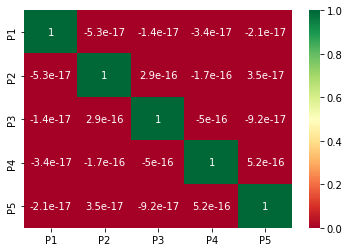

In [ ]:
correlation=x_scaled_transf.corr()
sns.heatmap(correlation,cmap="RdYlGn",annot=True)
plt.show()

In [ ]:
output_var.head()

0    0
1    0
2    1
3    2
4    0
Name: TARGET, dtype: int8

In [ ]:
# separate into train and test sets
train_x,test_x,train_y,test_y=train_test_split(x_scaled_transf,output_var,test_size=0.20,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(4454, 5) (1114, 5) (4454,) (1114,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=8)

In [ ]:
model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
predicted_values=model.predict(test_x)
predicted_values

array([2, 1, 1, ..., 1, 1, 0], dtype=int8)

# **ACCURACY SCORE-K Neighbors Classifier**

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,predicted_values))

ACCUIRACY SCORE
0.3994614003590664


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,predicted_values))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.32      0.32      0.32       316
           1       0.45      0.59      0.51       467
           2       0.38      0.20      0.26       331

    accuracy                           0.40      1114
   macro avg       0.38      0.37      0.36      1114
weighted avg       0.39      0.40      0.38      1114



CONFUSION MATRIX


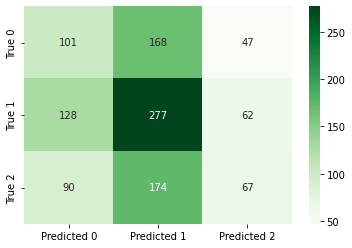

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,predicted_values)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(train_x, train_y)

XGBClassifier(objective='multi:softprob')

In [ ]:
# make predictions for test data
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]


# **ACCURACY SCORE-XGB Classifier**




In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,predictions))

ACCUIRACY SCORE
0.4281867145421903


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,predictions))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.36      0.13      0.19       316
           1       0.44      0.83      0.58       467
           2       0.40      0.15      0.22       331

    accuracy                           0.43      1114
   macro avg       0.40      0.37      0.33      1114
weighted avg       0.41      0.43      0.36      1114



CONFUSION MATRIX


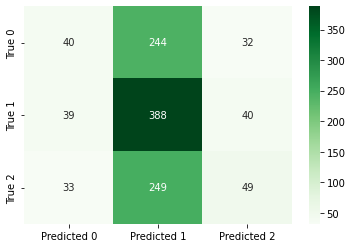

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,predictions)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [1]:
!jupyter nbconvert SBIpercdiff_1_0_SMP_KNN_XGBoost.ipynb

[NbConvertApp] Converting notebook SBIpercdiff_1_0_SMP_KNN_XGBoost.ipynb to html
[NbConvertApp] Writing 444574 bytes to SBIpercdiff_1_0_SMP_KNN_XGBoost.html
